__Real Estate Analysis - Linear Regression modeling__


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.metrics import r2_score
from scipy.stats import pearsonr


from warnings import filterwarnings
filterwarnings('ignore')


In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

# Reading data

In [2]:
data = pd.read_excel('Linear Regression.xlsx')
data.head()


,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


We have to predict the Price of the house and what are the factors affecting to Price

•	Target Variable (Price) is Continous


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
price          21613 non-null int64
sqft_living    21613 non-null int64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
floors         21613 non-null float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


# Missing Values treatment

In [4]:
# Finding Null Values

data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [5]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


# Plotting Histogram

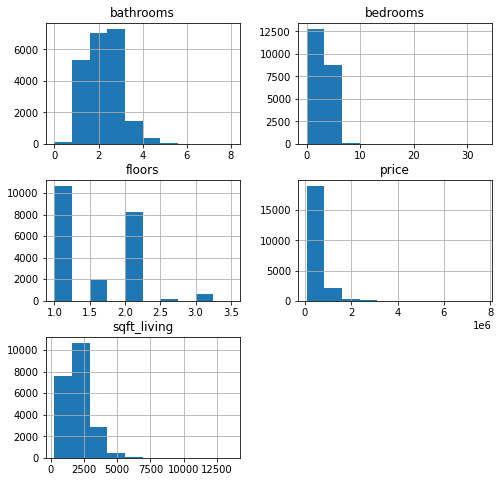

In [6]:
# Plotting Histogram with .hist()
data.hist(figsize=(8,8))
plt.show()



__Inference from Histogram__:

•	Bathrooms is Unimodal and has negative Skewness ie Mean < Median

•	Bedrooms is Unimodal and has positive Skewness ie Mean > Median

•	Price is Unimodal and has positive Skewness ie Mean > Median

•	Sqft_living is Unimodal and has positive Skewness ie Mean > Median

•	Floors is Multimodal


# Exploratory Data Analysis

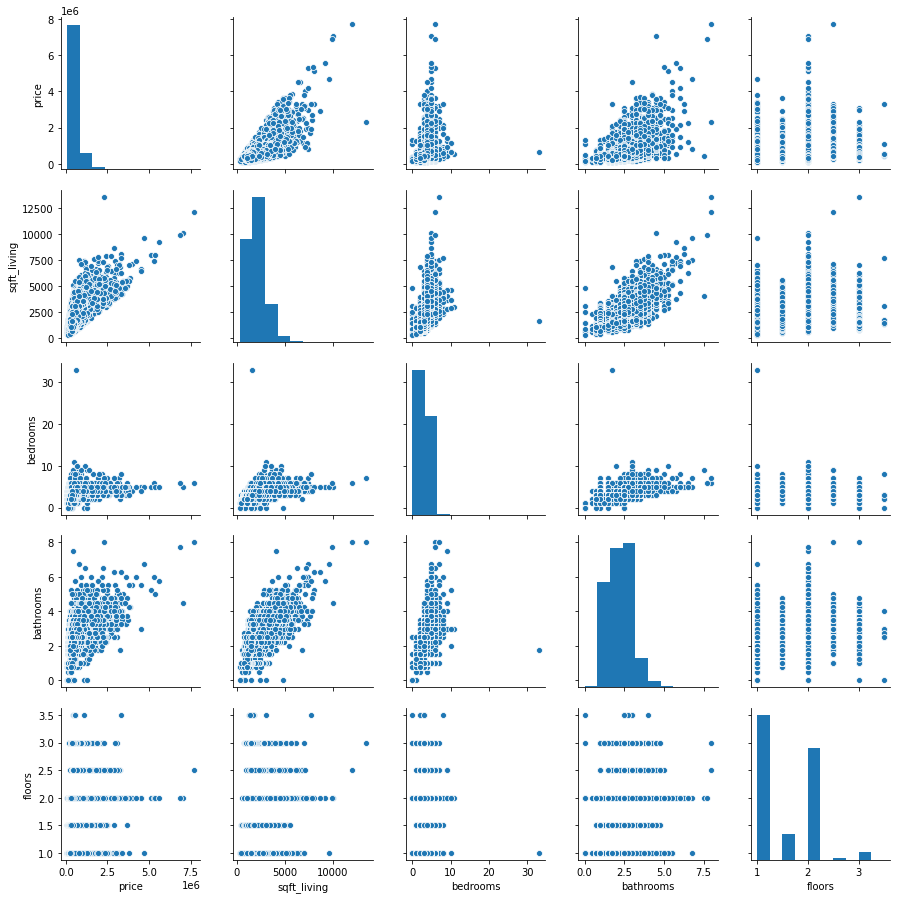

In [7]:
sns.pairplot(data)

## Finding Relationship Between variables


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

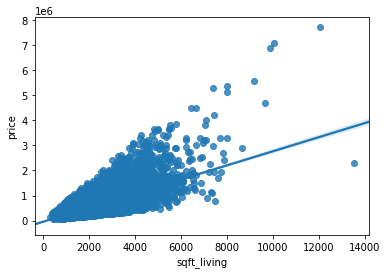

In [8]:
sns.regplot(data.sqft_living, data.price)


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

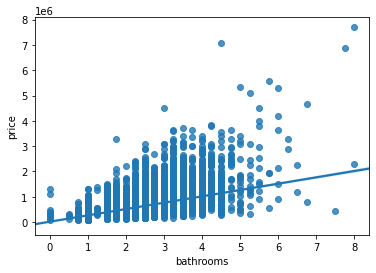

In [9]:
sns.regplot(data.bathrooms, data.price)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

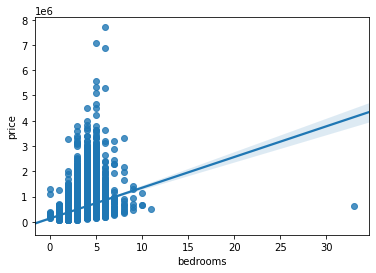

In [10]:
sns.regplot(data.bedrooms, data.price)

<AxesSubplot:xlabel='floors', ylabel='price'>

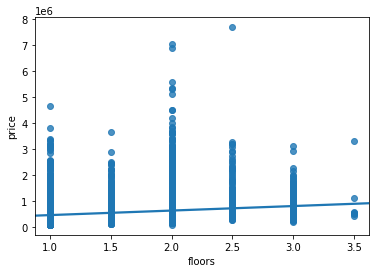

In [11]:
sns.regplot(data.floors, data.price)

__Inference from Pair plot & Reg plot__

The Dependent variable "Price" :

•	It has Strong Relation with area of living in square feet

•	It has moderate Relation with number of bathrooms and bedrooms

•	It has almost no Relation with number of floors.


## Outliers Detection with BoxPlot

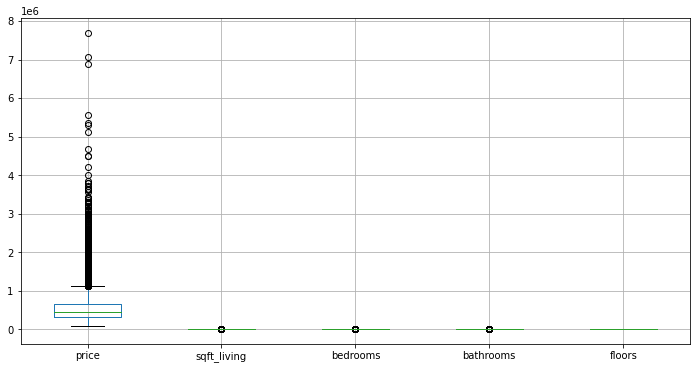

In [12]:
data.boxplot(figsize=(12,6))
plt.show()


<AxesSubplot:xlabel='price'>

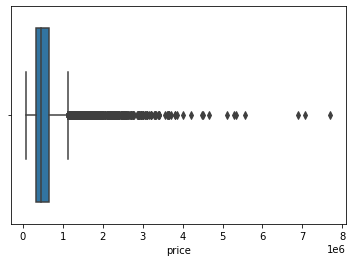

In [13]:
sns.boxplot(data['price'])

<AxesSubplot:xlabel='sqft_living'>

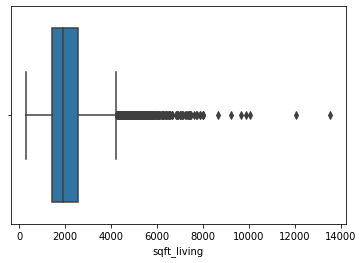

In [14]:
sns.boxplot(data['sqft_living'])

<AxesSubplot:xlabel='bedrooms'>

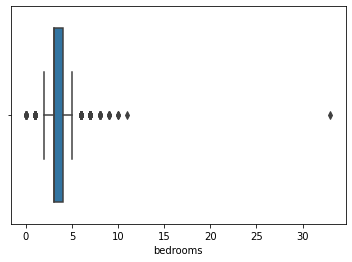

In [15]:
sns.boxplot(data['bedrooms'])

<AxesSubplot:xlabel='floors'>

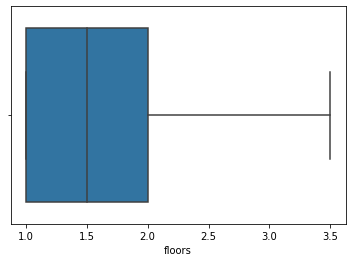

In [16]:
sns.boxplot(data['floors'])

<AxesSubplot:xlabel='bathrooms'>

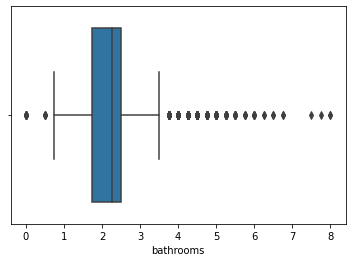

In [17]:
sns.boxplot(data['bathrooms'])

__Inference from Boxplot__

•	The Dependent Variable (Price) has many Outliers

•	Square feet Living has many Outliers

•	Bedrooms has Moderate Outliers but It also include an Extreme Outlier(which can be removed from dataset)

•	Floors has No Outlier

•	Bathroms has Moderate Outliers

# Correlation matrix

<AxesSubplot:>

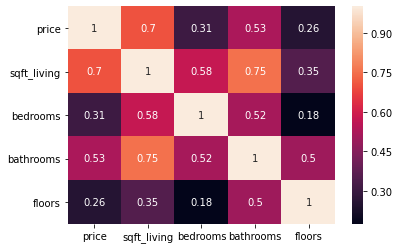

In [18]:
sns.heatmap(data.corr(),annot=True)

__Inference__

The Target variable 'Price' has :

•	Strong correlation with area of living in square feet

•	Moderate correlation with number of bathrooms and bedrooms

•	almost No correlation with number of floors.


# Application Of Linear Regression Model

- Target variable Price is Continuous

## __Linear regression Model 1__

__Price Vs sqft_living - area of living in square feet__

__Price__ - Dependent Variable

__sqft_living__ - Independent variable

In [19]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [20]:
x = data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [21]:
y = data.iloc[:,:1]
y.head()


,price
0,221900
1,538000
2,180000
3,604000
4,510000


__1. Splitting Dataset into Training and Test DataSet__

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

__2. Fitting Linear Regression Model__

In [23]:
# Fitting Linear Regression Model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__3. Framing Equation__


In [24]:
# Framing Equation
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)


Intercept is:  [-41947.45007397]
Coefficient is:  [[279.51011494]]


__3.1. Equation__ :

price = - 41947.45007397 + 279.51011494 (sqft_living)

__4. Predicting Values__

In [25]:
# Predicting Values

ypred = lin_reg.predict(x_test)

print("Predicted values:\n")
print(ypred)


Predicted values:

[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


__5. Calculating R-square value__

In [26]:
# Calculating R-square value

print("r-abssquare value is: ", r2_score(y_test, ypred))

r-abssquare value is:  0.48388318901296545


__6. Calculating p value__

In [27]:
# Calculating p value

stats, p = pearsonr(data.price, data.sqft_living)

print('The r value is {} and p value is {}'.format(stats,p))


The r value is 0.7020350524336836 and p value is 0.0


__Inference__ :

•	R-square value is 0.48 suggesting that only about 48% of the variance in the target variable.

•	p value is 0.0 which is less than 0.05 ie sqft_living is affecting Price of House


_________________

## Linear regression Model 2

__Price Vs Bedrooms__

__Price__ - Dependent Variable

__Bedroom__ - Independent variable

In [28]:
x1 = data.iloc[:,2:3]
x1.head()


,bedrooms
0,3
1,3
2,2
3,4
4,3


In [29]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


__1. Splitting Data into Train & Test Dataset__

In [30]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 2)

__2. Fitting Linear Regression model__

In [31]:
# Fitting Linear Regression model
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__3. Framing Equation__

In [32]:
# Framing Equation

print("Intercept is: ", lin_reg.intercept_)

print("Coefficient is: ", lin_reg.coef_)


Intercept is:  [142835.36507291]
Coefficient is:  [[118301.95858816]]


__3.1. Equation__:

price = 142835.36507296 + 118301.95858814 (bedrooms)


__4. Predicting Values__

In [33]:
# Predicting Values

y_pred1 = lin_reg.predict(x1_test)

print("Predicted values:\n")

print(y_pred1)


Predicted values:

[[616043.19942553]
 [497741.24083738]
 [379439.28224922]
 ...
 [616043.19942553]
 [497741.24083738]
 [616043.19942553]]


__5. Calculating R-square value__

In [34]:
# Calculating R-square value
print("The r square value is: ", r2_score(y1_test, y_pred1))

The r square value is:  0.10373065781231461


__6. Calculating p value__

In [35]:
# Calculating p value

stats, p = pearsonr(data.price, data.bedrooms)

print('The r value is {} and p value is {}'.format(stats,p))


The r value is 0.3083495978848227 and p value is 0.0


__Inference__:

•	R-square value is 0.10 suggesting that only about 10% of the variance in the target variable.

•	p value is 0.0 which is less than 0.05 ie bedrooms is affecting Price of House


_______________

## __Linear regression Model 3__


__Price Vs Bathrooms__

__Price__ - Dependent Variable

__Bathroom__- Independent variable

In [36]:
x2 = data.iloc[:,3:4]
x2.head()


,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [37]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


__1.  Splitting Dataset into Test & Train dataset__

In [38]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3,random_state=2)

__2. Fitting Linear Regression model__

In [39]:
# Fitting Linear Regression model

lin_reg.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 __3. Framing Equation__

In [40]:
# Framing Equation

print("Intercept is: ", lin_reg.intercept_)

print("Coefficient is: ", lin_reg.coef_)


Intercept is:  [13513.13889572]
Coefficient is:  [[249375.03130974]]


__3.1. Equation__:

price = 13513.13889573 + 249375.03130974 (bathrooms)


__4. Predicting  value__


In [41]:
# Predicting  value
y_pred2=lin_reg.predict(x2_test)
print("Predicted values:\n")
print(y_pred2)


Predicted values:

[[574606.95934265]
 [387575.68586034]
 [262888.17020547]
 ...
 [636950.71717008]
 [574606.95934265]
 [449919.44368777]]


__5. Calculating R-square value__

In [42]:
# Calculating R-square value

print("The r square value is: ", r2_score(y2_test, y_pred2))

The r square value is:  0.2729690023991552


__6. Calculating P-Value__

In [43]:
# Calculating P-Value

stats, p = pearsonr(data.price, data.bathrooms)

print('The r value is {} and p value is {}'.format(stats,p))


The r value is 0.5251375045796027 and p value is 0.0


__Inference__

•	R-square value is 0.27 suggesting that only about 27% of the variance in the target variable.

•	p value is 0.0 which is less than 0.05 ie bathrooms is affecting Price of House


_____

## __Linear regression Model 4__


__Price Vs Floors__

__Price__ - Dependent Variable

__Floors__ - Independent variable

In [44]:
x3 = data.iloc[:,4:]
x3.head()


,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [45]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


__1. Splitting Dataset into Train & Test dataset__

In [46]:
# Splitting Dataset into Train & Test dataset

x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,test_size=0.3,random_state=2)

__2. Fitting Linear Model__

In [47]:
# Fitting Linear Model :

lin_reg.fit(x3_train,y3_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__3. Framing Equation__

In [48]:
# Framing Equation

print("Intercept is: ", lin_reg.intercept_)

print("Coefficient is: ", lin_reg.coef_)


Intercept is:  [283855.8965018]
Coefficient is:  [[171935.92961606]]


__3.1. Equation__:

price = 283855.89650181 + 171935.92961605 (floors)


__4. Predicting Values__

In [49]:
# Predicting Values

y_pred3 =lin_reg.predict(x3_test)

print("Predicted values:\n")

print(y_pred3)


Predicted values:

[[541759.79092589]
 [455791.82611786]
 [455791.82611786]
 ...
 [627727.75573392]
 [627727.75573392]
 [541759.79092589]]


__5. Calculating R-square value__

In [50]:
# Calculating R-square value

print("The r square value is: ", r2_score(y3_test, y_pred3))

The r square value is:  0.06879667978104331


__6. Calculating p value__

In [51]:
# Calculating p value

stats, p = pearsonr(data.price, data.floors)

print('The r value is {} and p value is {}'.format(stats,p))


The r value is 0.256793884063341 and p value is 1.6e-322


__Inference__:
    
•	R-square value is 0.06 suggesting that only about 6% of the variance in the target variable.

•	p value is 1.6e-322 which is less than 0.05 ie floors is affecting Price of House


_____

## __Linear Regression Model 5__



__Price Vs Other Variables__

__Price__ - Dependent Variable

__Other Variables__ - Independent variable

In [53]:
# x4=data.iloc[:,1:5]

x4 = data.drop(['price'], axis=1)
x4.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [54]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


__1. Splitting data into train & test Dataset__

In [55]:
# Splitting data into train & test Dataset

x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=0.3,random_state=2)


__2. Fitting Linear Regression Model__

In [56]:
# Fitting Linear Regression Model :

lin_reg.fit(x4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__3. Framing Equation__

In [57]:
# Framing Equation

print("Intercept is: ", lin_reg.intercept_)

print("Coefficient is: ", lin_reg.coef_)


Intercept is:  [73808.86183529]
Coefficient is:  [[   306.72838252 -55720.77178327   8705.50888837   -266.52957882]]


__Equation__:
    
price = 73808.86183529 + 306.72838252(sqft_living) - 55720.77178327(bedrooms) + 8705.50888837(bathrooms) - 266.52957882(floors)

__4. Predicting values__

In [58]:
# Predicting values

y_pred4 = lin_reg.predict(x4_test)
print("Predicted values:\n")
print(y_pred4)


Predicted values:

[[609328.77721079]
 [585038.87031192]
 [415562.45223517]
 ...
 [599102.75434259]
 [339784.19873135]
 [516024.79183523]]


__5. calculating rsquare value__

In [59]:
# calculating rsquare value

print("The r square value is: ", r2_score(y4_test, y_pred4))


The r square value is:  0.5105722437453338


__Inference__:

•	R-square value is 0.51 suggesting that only about 51% of the variance in the target variable.

________________